In [29]:
from skimage.transform import radon, iradon
import pydicom as dicom
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt

In [6]:
path = "../data/dicom/"

In [56]:
high_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "high_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]
high_metal_folder[1][:5]

['../data/dicom/high_metal/acquisition_1/001.dcm',
 '../data/dicom/high_metal/acquisition_1/002.dcm',
 '../data/dicom/high_metal/acquisition_1/003.dcm',
 '../data/dicom/high_metal/acquisition_1/004.dcm',
 '../data/dicom/high_metal/acquisition_1/005.dcm']

4095


/Users/hugo/opt/miniconda3/envs/artefact/lib/python3.9/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


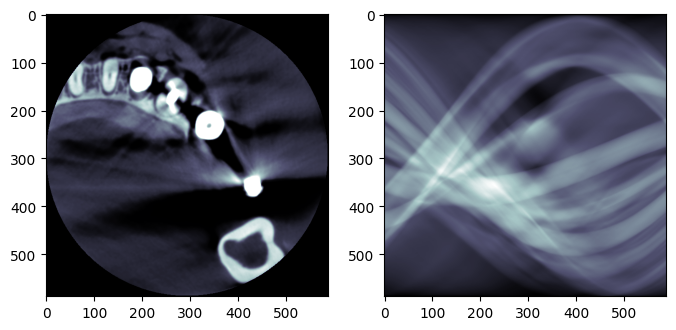

In [93]:
y = dicom.dcmread(high_metal_folder[1][200]).pixel_array
theta = np.linspace(0.0, 180.0, max(y.shape), endpoint=False)
y = y / max(y.flatten()) 
metal = y >=1
sinogram_y = radon(y, theta=theta, circle=True)
sinogram_metal = radon(metal, theta=theta, circle=True)
sinogram_without_metal = (1-sinogram_metal>=1)*sinogram_y
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8, 4.5))
ax1[0,0].imshow(y, cmap=plt.cm.bone)
ax2[0,0].imshow(metal, cmap=plt.cm.bone, )



In [26]:
back = iradon(sinogram_y, theta=theta, circle=True)
back

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])